In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [279]:
data=pd.read_csv("Datasets/Algerian_forest_fires_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [280]:
df=data.copy()

In [281]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [283]:
df.shape

(247, 14)

##### Data Cleaning

In [284]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [285]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [286]:
df.loc[:121,'Region']=1
df.loc[122:,'Region']=2
df[['Region']]=df[['Region']].astype(int)

In [287]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [288]:
#how much null values are there in each column
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [289]:
#remove null value rows
df=df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [290]:
#as 122 was null values check what is in 122
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [291]:
# checking for duplicate values in the columns
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [292]:
#remove the 122th column and name it as df1
df1=df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows',None)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [293]:
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [294]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [295]:
df1.columns=df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

##### converting the dataframes into int and float except class

In [296]:
df1[['month','day','year','Temperature','RH','Ws']]=df1[['month','day','year','Temperature','RH','Ws']].astype(int)

In [297]:
objects=[features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i!='Classes':
        df1[i]=df1[i].astype(float)
    

In [298]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [299]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [300]:
print(df1.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [301]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [302]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [303]:
df1.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [304]:
df1['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

##### Here there are only two categories but due to issues in spacing  it seperated

In [305]:
df1.Classes=df1.Classes.str.strip()

In [306]:
df1['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [307]:
#converting Classes to 0 and 1 so we can find the corr()
df1['Classes']=np.where(df1['Classes']=='not fire',0,1)
df1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2


In [308]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [309]:
df1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

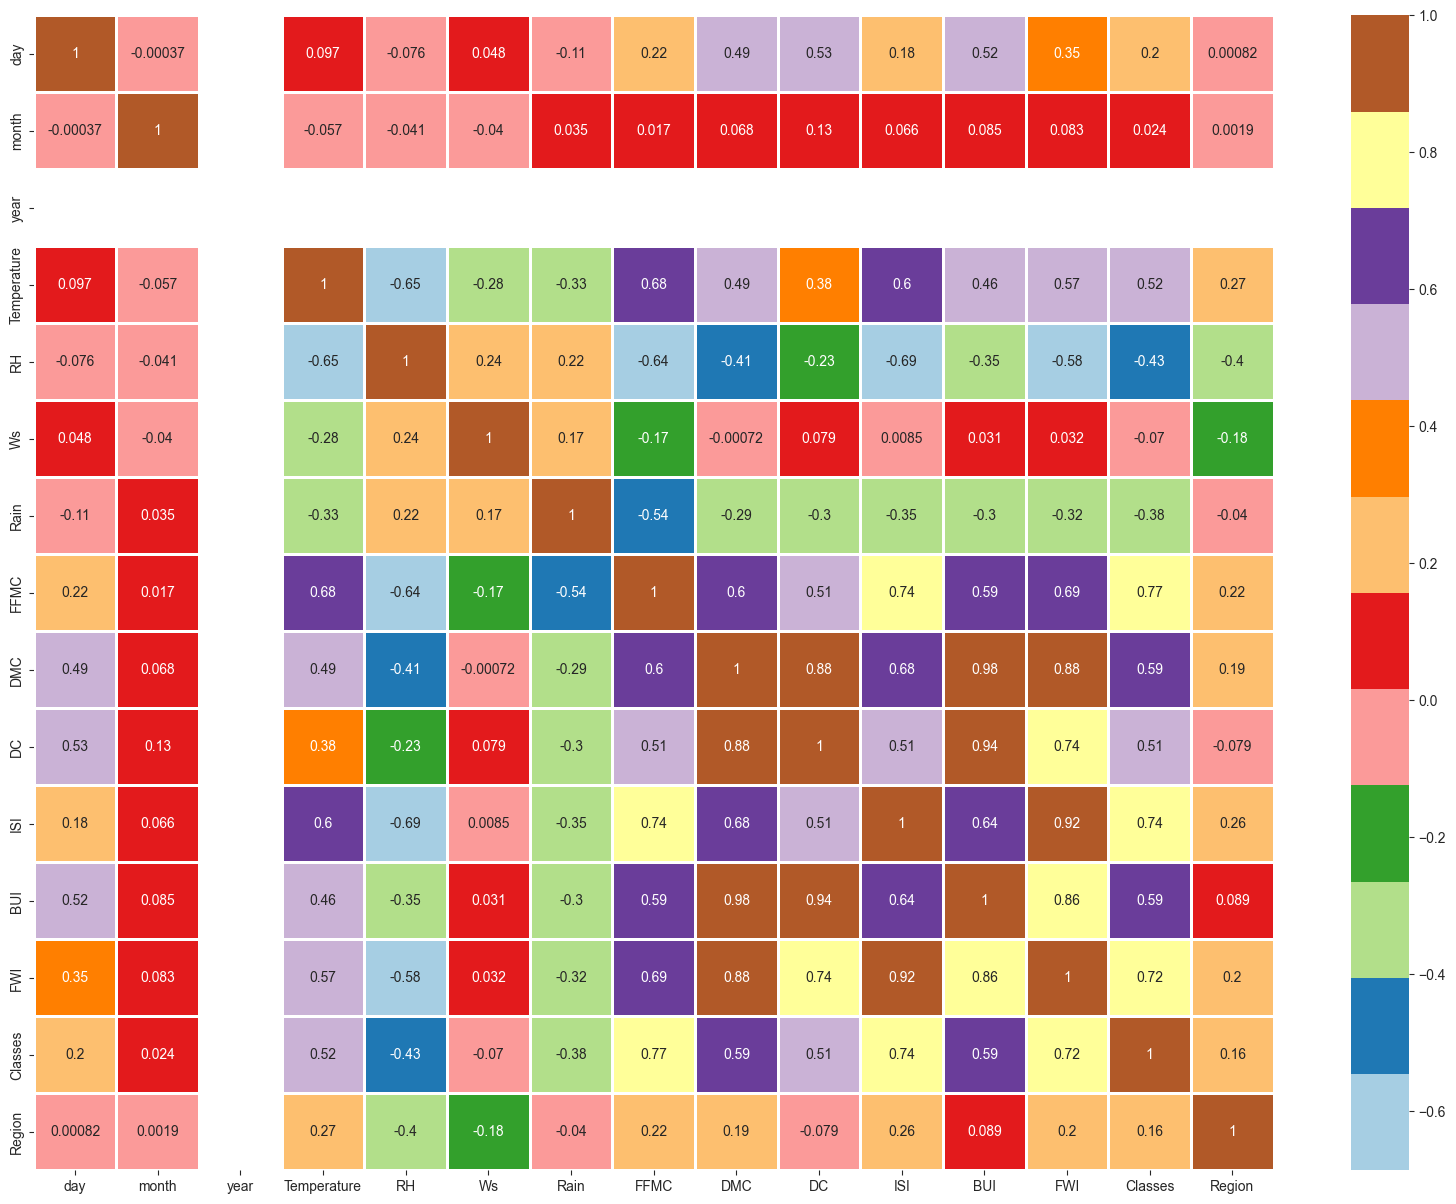

In [310]:
#plot this on a heat map so its easy to understand
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='white',cbar=True,cmap='Paired',xticklabels='auto',yticklabels='auto')

In [311]:
df1.to_csv('Cleaned_data.csv',index=False)

In [312]:
x=df1.iloc[:,0:13]
y=df1['Classes']

In [313]:
x.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [314]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [315]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
print(vif_data)

        feature         VIF
0           day    1.487120
1         month    1.088510
2          year  514.359602
3   Temperature    2.415204
4            RH    2.764923
5            Ws    1.312931
6          Rain    1.551373
7          FFMC    4.120286
8           DMC   76.480443
9            DC   25.363045
10          ISI   23.122783
11          BUI  171.616713
12          FWI   40.471391


In [316]:
#droping features sucha as day,month,year because it is not important for analysis
df2=df1.drop(['day','month','year'],axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [317]:
X=df2.iloc[:,0:10]
y=df2['FWI']

In [318]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [319]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

##### Spliting the database into train and test

In [320]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [321]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [322]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


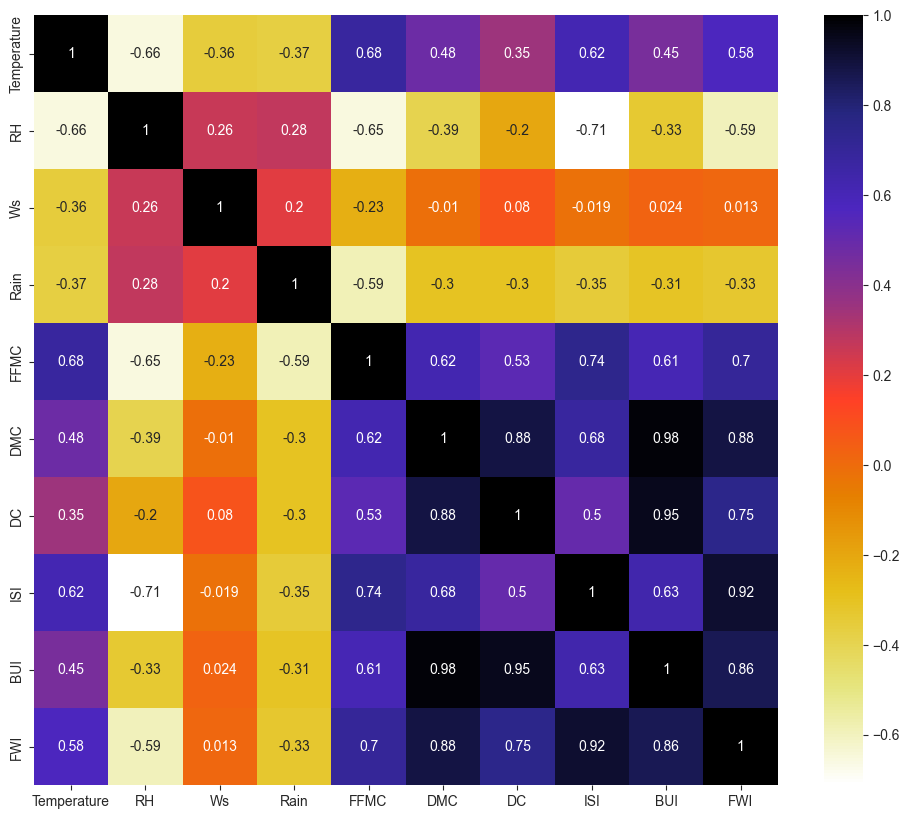

In [323]:
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

##### Features having corr() greater than 0.8 will be removeda

In [324]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [325]:
corr_features=correlation(X_train,0.8)
corr_features

{'BUI', 'DC', 'FWI'}

##### These three have the corr greater than 0.8 do we remove it.

In [326]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [327]:
from sklearn.preprocessing import StandardScaler
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [328]:
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

Text(0.5, 1.0, 'X_train After Scaling')

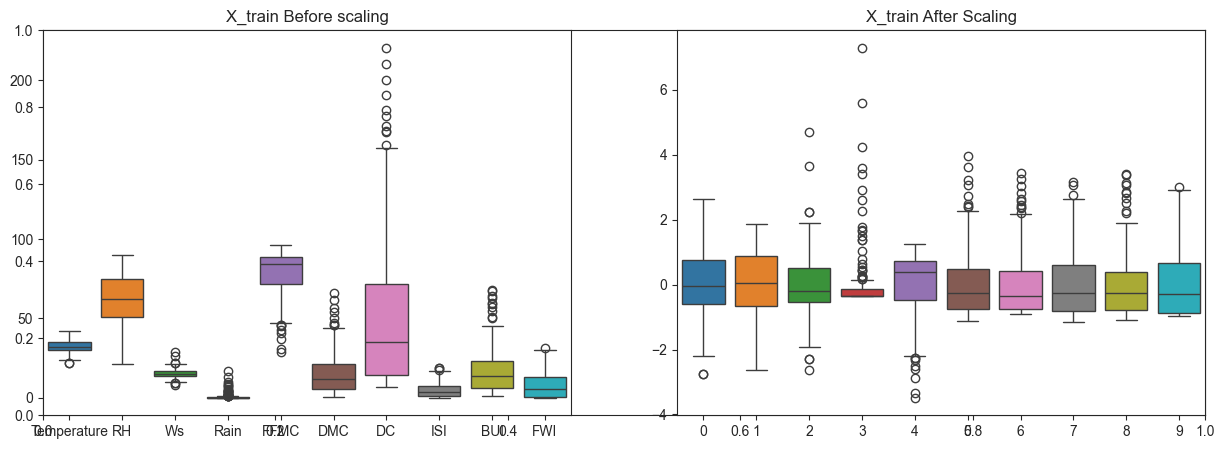

In [329]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Model Building For Classification Analysis

In [330]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [331]:
X=df2.iloc[:,0:10]
y=df2['Classes']

In [332]:
X.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [333]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [335]:
X_train.shape,X_test.shape

((170, 10), (73, 10))

In [336]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [337]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [338]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [339]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

#### Logistic Regression

In [340]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train_scaled,y_train)

LogisticRegression()

In [341]:
print("Intercept is :",Logistic_Regression.intercept_)
print("COefficient is :",Logistic_Regression.coef_)


Intercept is : [0.64920905]
COefficient is : [[-0.00988359  0.2475491  -0.22762311 -0.53557828  2.54097133  0.93198056
   2.75297352]]


In [342]:
print("Training Score:",Logistic_Regression.score(X_train_scaled,y_train))
print("Test Score:",Logistic_Regression.score(X_test_scaled,y_test))

Training Score: 0.9705882352941176
Test Score: 0.9178082191780822


In [343]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test_scaled)
Logistic_Regression_Prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [344]:
Actual_predicted=pd.DataFrame({'Actual Revenue':y_test,'Predicted Revenue': Logistic_Regression_Prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [345]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print("Accuracy Score value: {:.4f}".format(Score))
print(Classification_Report)


Logistic Regression
Accuracy Score value: 0.9178
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.97      0.88      0.93        43

    accuracy                           0.92        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.92      0.92      0.92        73



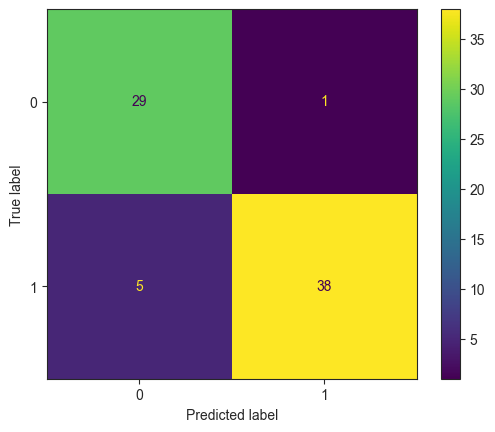

In [346]:
from sklearn.metrics import ConfusionMatrixDisplay
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression,X_test_scaled,y_test)
Logistic_Regression_Confusion_Matrix

###

#### Decision Tree

In [347]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [348]:
Decision_Tree_Classifier_prediction = Decision_Tree_Classifier.predict(X_test_scaled)
Decision_Tree_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [349]:
Actual_predicted = pd.DataFrame({'Actual Revenue':y_test, 'Predicted Revenue': Decision_Tree_Classifier_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [350]:
Score= accuracy_score(y_test,Decision_Tree_Classifier_prediction)
Classification_Report = classification_report(y_test,Decision_Tree_Classifier_prediction)
print("Decision Tree")
print("Accuracy Score value: {:.4f}".format(Score))
print(Classification_Report)

Decision Tree
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        43

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



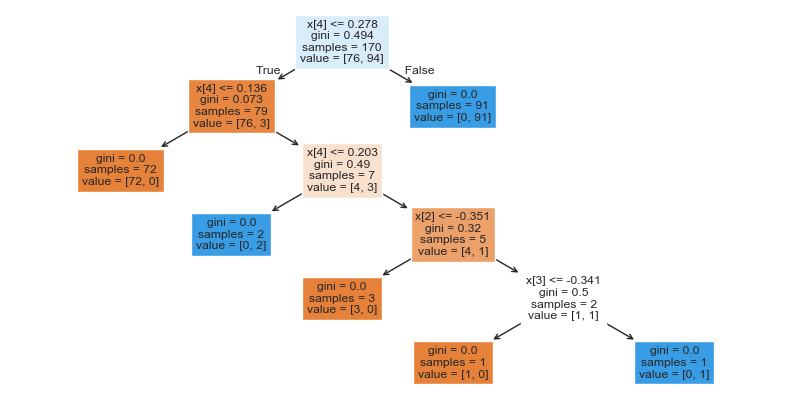

In [351]:
from sklearn import tree
plt.figure(figsize = (10,5))
tree.plot_tree(Decision_Tree_Classifier,filled = True)
plt.show()

#### Random Forest

In [352]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [353]:

print("Training Score:",Random_Forest_Classifier.score(X_train_scaled, y_train))
print("Test Score:",Random_Forest_Classifier.score(X_test_scaled,y_test))

Training Score: 1.0
Test Score: 0.9863013698630136


In [354]:
Random_Forest_Classifier_prediction = Random_Forest_Classifier.predict(X_test_scaled)
Random_Forest_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [355]:

Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [356]:
Score = accuracy_score(y_test,Random_Forest_Classifier_prediction)
Classification_Report = classification_report(y_test,Random_Forest_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.9863
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        43

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



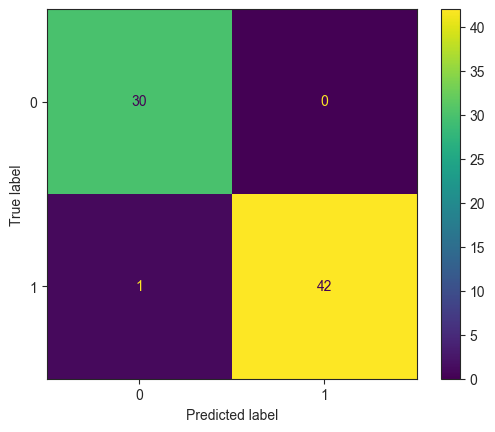

In [357]:
Random_Forest_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Random_Forest_Classifier, X_test_scaled, y_test)
Random_Forest_Classifier_Confusion_Matrix

#### KNieghborsClassifier

In [358]:
from sklearn.neighbors import KNeighborsClassifier
K_Neighbors_Classifier = KNeighborsClassifier()
K_Neighbors_Classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [359]:

print("Training Score:",K_Neighbors_Classifier.score(X_train_scaled, y_train))
print("Test Score:",K_Neighbors_Classifier.score(X_test_scaled,y_test))

Training Score: 0.9647058823529412
Test Score: 0.9315068493150684


In [360]:

K_Neighbors_Classifier_prediction = K_Neighbors_Classifier.predict(X_test_scaled)
K_Neighbors_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [361]:

Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': K_Neighbors_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [362]:

Score = accuracy_score(y_test,K_Neighbors_Classifier_prediction)
Classification_Report = classification_report(y_test,K_Neighbors_Classifier_prediction)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

KNeighbors Classifier
Accuracy Score value: 0.9315
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.95      0.93      0.94        43

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73



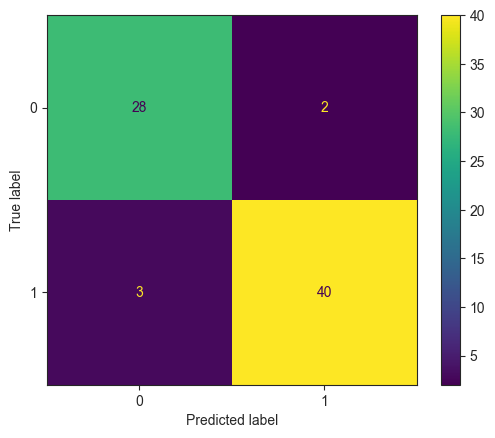

In [363]:

K_Neighbors_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(K_Neighbors_Classifier, X_test_scaled, y_test)
K_Neighbors_Classifier_Confusion_Matrix

#### XGBoost

In [364]:
from xgboost import XGBClassifier
XG_Boost_Classifier = XGBClassifier()
XG_Boost_Classifier.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [365]:
print("training Score:",XG_Boost_Classifier.score(X_train_scaled,y_train))

training Score: 0.9941176470588236


In [366]:
print("testing score:",XG_Boost_Classifier.score(X_test_scaled,y_test))

testing score: 0.9726027397260274


In [367]:
XGB_prediction=XG_Boost_Classifier.predict(X_test_scaled)
XGB_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [368]:
Actual_prediction =pd.DataFrame({'Actual Revenue':y_test,'Predicted Revenue':XGB_prediction})
Actual_prediction

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [369]:
Score = accuracy_score(y_test,XGB_prediction)
Classification_Report = classification_report(y_test,XGB_prediction)
print("XGBoost")
print("Accuracy Score value:{:.4f}".format(Score))
print(Classification_Report)

XGBoost
Accuracy Score value:0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



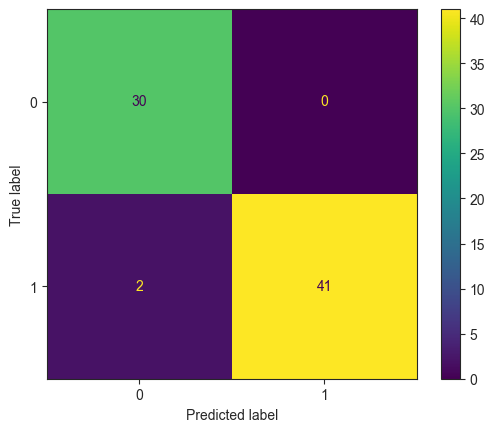

In [370]:
xgb_cm=ConfusionMatrixDisplay.from_estimator(XG_Boost_Classifier,X_test_scaled,y_test)

#### Accuracy score results summary

| Models                        | Accuracy score |
|-------------------------------|---------------|
| Decision Tree Classifier      | 99.52 %       |
| Random Forest Classifier      | 98.63 %       |
| XGBoost Classifier            | 97.26 %       |
| KNeighbors Classifier         | 93.15 %       |
| Logistic Regression Accuracy  | 91.78 %       |


#### HyperParameter Tuning

### Decision Tree Classifier Tuning

In [371]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {
    "max_depth": np.linspace(1, 50, 25, dtype=int),
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "criterion": ["gini", "entropy"]
}
Random_DT=RandomizedSearchCV(Decision_Tree_Classifier,params,cv=10,n_jobs=-1)
Random_DT.fit(X_train_scaled, y_train).best_estimator_

DecisionTreeClassifier(max_depth=np.int64(7), min_samples_split=20)

In [372]:
Best_DT=Random_DT.best_estimator_
Best_DT.score(X_test_scaled,y_test)

0.9452054794520548

In [373]:
BestDT_prediction =Best_DT.predict(X_test_scaled)
BestDT_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [374]:
Actual_predicted=pd.DataFrame({'Actual Revenue':y_test,'Predicted Revenue':BestDT_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [375]:
Score=accuracy_score(y_test,BestDT_prediction)
Classification_Report = classification_report(y_test,BestDT_prediction)
print("Final DT")
print("Accuracy Score value:{:.4f}".format(Score))
print(Classification_Report)

Final DT
Accuracy Score value:0.9452
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.91      0.95        43

    accuracy                           0.95        73
   macro avg       0.94      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



##### Random Forest classifier Tunning

In [376]:
params = {
    "n_estimators":[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'max_features':['auto','log2']
}
Random_rf = RandomizedSearchCV(Random_Forest_Classifier,params,cv=10,n_jobs=-1)
Random_rf.fit(X_train,y_train).best_estimator_

c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\ba

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=4,
                       min_samples_split=9, n_estimators=130)

In [377]:
Best_rf = Random_rf.best_estimator_
Best_rf.score(X_test ,y_test)

0.9726027397260274

In [378]:
Bestrf_pred = Best_rf.predict(X_test)
Bestrf_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [379]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [380]:
Score = accuracy_score(y_test, Bestrf_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



### Model Selection

##### Applying Kfold Cross-Validation to know the exact Accuracy Score for all models

In [381]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)

In [382]:
cv_xgb= cross_val_score(XG_Boost_Classifier,X,y,cv=skfold,scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.9875


In [383]:
cv_rf=cross_val_score(Best_rf,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9793


In [384]:
cv_dt =cross_val_score(Best_DT,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9875


In [385]:

cv_knn =cross_val_score(K_Neighbors_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9052


In [386]:
cv_lg=cross_val_score(Logistic_Regression,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

CV Score Logistic Regression 0.9630


c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

| Models                        | Accuracy score |
|-------------------------------|---------------|
| XGBoost Classifier            | 98.75 %       |
| Random Forest Classifier      | 97.52 %       |
| Decision Tree Classifier      | 97.12 %       |
| Logistic Regression           | 96.30 %       |
| KNeighbors Classifier         | 90.52 %       |


#### XG Boost Parameter Tunning

In [387]:
params = {
    "n_estimators": [90, 100, 115, 130],
    "max_depth": range(2, 20, 1),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "min_child_weight": range(1, 10, 1),
    "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "reg_alpha": [0, 0.01, 0.1, 1, 10],
    "reg_lambda": [0, 0.01, 0.1, 1, 10]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search with Cross Validation
random_xgb = RandomizedSearchCV(xgb, params, cv=10, n_jobs=-1, random_state=42)
best_xgb = random_xgb.fit(X_train_scaled, y_train).best_estimator_

c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [388]:
best_xgb.score(X_test_scaled,y_test)
best_xgb_pred=best_xgb.predict(X_test_scaled)

In [389]:
Score = accuracy_score(y_test, best_xgb_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



#### Fetaure Selection for Model Deployment

In [390]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,0.361859
4,FFMC,0.315347
3,Rain,0.139313
5,DMC,0.122338
0,Temperature,0.035853
1,RH,0.022321
2,Ws,0.002970


### Model Deployment

In [391]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [392]:
X_train_new = X_train.drop(['Ws', 'RH','Temperature'], axis=1)
X_test_new = X_test.drop(['Ws', 'RH','Temperature'], axis=1)

In [393]:
X_train_new.columns

Index(['Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [394]:

X_test_new.columns

Index(['Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [395]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [396]:
rf_model =Random_rf.fit(X_train_new, y_train).best_estimator_
rf_model.score(X_test_new, y_test)

c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\ba

0.9726027397260274

In [397]:
rf_model_pred = rf_model.predict(X_test_new)
rf_model_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [398]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': rf_model_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [399]:
Score = accuracy_score(y_test, rf_model_pred)
Classification_Report = classification_report(y_test, rf_model_pred)
print("Final Model Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Final Model Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



In [400]:
best_random_grid=Random_rf.best_estimator_
best_random_grid.fit(X_train_new, y_train)
bestrf_pred = best_random_grid.predict(X_test_new)
bestrf_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [401]:
import bz2
import joblib

with bz2.BZ2File('Classification1.joblib', 'wb') as file:
    joblib.dump(best_random_grid, file)


with bz2.BZ2File('Classification1.joblib', 'rb') as file:
    loaded_model = joblib.load(file)


In [402]:

sample_input = [[13.1, 47.1, 2.5, 0.3]]

prediction = loaded_model.predict(sample_input)

print(f"Predicted Class: {prediction[0]}")


Predicted Class: 0


c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [403]:
X_train_new

,Rain,FFMC,DMC,ISI
61,0.0,78.8,4.8,2.0
116,5.8,48.6,3.0,0.4
52,0.4,68.2,10.5,1.8
66,0.0,86.4,13.0,5.2
26,0.0,89.0,21.6,9.2
97,0.1,75.8,3.6,2.1
92,7.2,46.0,1.3,0.2
229,0.0,92.5,25.2,11.2
40,0.0,81.1,8.1,2.6
13,0.5,59.0,4.6,1.0


In [404]:

X = df2.iloc[:,0:10]
y= df2['FWI']

In [405]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

### Regression

In [406]:
from sklearn.linear_model import LinearRegression 
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train,y_train)

LinearRegression()

In [407]:
print('Intercept is:',Linear_Regression.intercept_)
print('Coefficient is:',Linear_Regression.coef_)

Intercept is: 2.220446049250313e-14
Coefficient is: [ 1.77681279e-16 -2.77555756e-16 -1.12757026e-16 -1.82145965e-16
 -6.24500451e-17 -4.51028104e-16  1.11022302e-16 -7.78890841e-16
 -1.52655666e-16  1.00000000e+00]


In [408]:
print("Training Score:",Linear_Regression.score(X_train,y_train))
print("Test Score:",Linear_Regression.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


In [409]:
Linear_Regression_predict= Linear_Regression.predict(X_test)
Linear_Regression_predict

array([ 9.70000000e+00,  7.20000000e+00,  8.00000000e+00,  6.30000000e+00,
        7.70000000e+00,  1.21000000e+01,  2.00000000e-01,  1.02000000e+01,
        5.20000000e+00,  1.37000000e+01,  1.20000000e+00,  1.32000000e+01,
        6.30000000e+00,  1.50000000e+01,  6.00000000e-01,  3.00000000e-01,
        8.00000000e-01,  1.90000000e+00,  3.90000000e+00,  3.00000000e-01,
        7.70000000e+00,  5.30000000e+00,  4.20000000e+00,  2.00000000e-01,
        2.50000000e+00,  3.80000000e+00,  9.10000000e+00,  3.00000000e-01,
        2.00000000e-01,  4.00000000e-01,  1.53000000e+01,  5.00000000e-01,
        3.00000000e-01,  2.23000000e+01,  4.10000000e+00,  8.00000000e-01,
        8.00000000e-01,  1.63000000e+01,  2.69000000e+01,  9.00000000e-01,
        6.70000000e+00,  4.00000000e-01, -8.23940196e-16,  1.40000000e+00,
        8.00000000e-01, -1.45185559e-15,  4.20000000e+00,  7.10000000e+00,
       -4.70695992e-16,  6.10000000e+00,  3.90000000e+00,  9.90000000e+00,
       -3.08961693e-15,  

In [410]:
Actual_predicted=pd.DataFrame({'Actual': y_test, 'Predicted': Linear_Regression_predict})
Actual_predicted

,Actual,Predicted
110,9.7,9.700000e+00
150,7.2,7.200000e+00
37,8.0,8.000000e+00
75,6.3,6.300000e+00
109,7.7,7.700000e+00
71,12.1,1.210000e+01
122,0.2,2.000000e-01
73,10.2,1.020000e+01
154,5.2,5.200000e+00
234,13.7,1.370000e+01


In [411]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
meanAbErr = metrics.mean_absolute_error(y_test,Linear_Regression_predict)
meanSqErr = metrics.mean_squared_error(y_test,Linear_Regression_predict)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,Linear_Regression_predict))
print("Mean Absolute Error:",meanAbErr)
print("Mean Square Error:", meanSqErr)
print("Root Mean Square Error:", rootMeanSqErr)

Mean Absolute Error: 2.9253775977669922e-15
Mean Square Error: 1.3678182900338274e-29
Root Mean Square Error: 3.698402749882478e-15


In [412]:
linear_r2=r2_score(y_test,Linear_Regression_predict)
linear_r2

1.0

In [413]:
from sklearn.linear_model import Lasso
Lasso_Regression= Lasso()
Lasso_Regression.fit(X_train,y_train)

Lasso()

In [414]:

print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : 0.5059966608181341
Coefficient is : [ 0.         -0.00650875  0.         -0.          0.          0.
  0.00456524  0.          0.          0.95456758]


In [415]:

print("Training Score:",Lasso_Regression.score(X_train, y_train))
print("Test Score:",Lasso_Regression.score(X_test,y_test))

Training Score: 0.9994362203413306
Test Score: 0.9990837217862172


In [416]:

Lasso_Regression_prediction = Lasso_Regression.predict(X_test)
Lasso_Regression_prediction

array([ 9.58284770e+00,  7.31211242e+00,  7.92729108e+00,  6.58407558e+00,
        7.68834760e+00,  1.19977364e+01,  2.72223834e-01,  1.02210364e+01,
        5.22988902e+00,  1.36522972e+01,  1.25212191e+00,  1.30024737e+01,
        6.45229709e+00,  1.47434436e+01,  7.13425250e-01,  3.11501875e-01,
        9.59721855e-01,  2.00276777e+00,  3.87522416e+00,  3.96728091e-01,
        7.86850445e+00,  5.20021883e+00,  4.88313675e+00,  2.57380238e-01,
        2.55767759e+00,  3.94757275e+00,  8.98553284e+00,  3.48154341e-01,
        2.27784165e-01,  6.97178082e-01,  1.52160492e+01,  5.40189441e-01,
        3.57858757e-01,  2.21851757e+01,  4.10382061e+00,  9.05251813e-01,
        9.48530449e-01,  1.60552854e+01,  2.66108176e+01,  1.06226131e+00,
        6.56285698e+00,  5.09572201e-01,  5.60534912e-03,  1.55745379e+00,
        9.18256164e-01, -3.85863334e-02,  4.53084416e+00,  6.98313627e+00,
       -1.63209395e-02,  6.72219824e+00,  3.87009813e+00,  9.74670890e+00,
       -1.95166056e-02,  

In [417]:

Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Lasso_Regression_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.582848
150,7.2,7.312112
37,8.0,7.927291
75,6.3,6.584076
109,7.7,7.688348
71,12.1,11.997736
122,0.2,0.272224
73,10.2,10.221036
154,5.2,5.229889
234,13.7,13.652297


In [418]:

meanAbErr = metrics.mean_absolute_error(y_test, Lasso_Regression_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Lasso_Regression_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Lasso_Regression_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.1263362385773002
Mean Square Error: 0.03180804290865266
Root Mean Square Error: 0.1783480947715805


In [419]:
lasso_r2 =  r2_score(y_test, Lasso_Regression_prediction)
print("R-Square:",lasso_r2)

R-Square: 0.9990837217862172


In [420]:
from sklearn.linear_model import Ridge

Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train, y_train)

Ridge()

In [421]:
print('Intercept is :',Ridge_Regression.intercept_)
print('Coefficient is :',Ridge_Regression.coef_)

Intercept is : 0.007100129278578393
Coefficient is : [-3.24715954e-05 -2.77948723e-05 -2.74542405e-05  4.81210124e-05
 -1.77368192e-04  3.59917432e-04  3.13811445e-05  4.04208264e-03
  4.75031635e-04  9.96582844e-01]


In [422]:
print("Training Score:",Ridge_Regression.score(X_train, y_train))
print("Test Score:",Ridge_Regression.score(X_test,y_test))

Training Score: 0.9999996941955578
Test Score: 0.9999996944062706


In [423]:

Ridge_Regression_Prediction = Ridge_Regression.predict(X_test)
Ridge_Regression_Prediction

array([ 9.69927310e+00,  7.20012914e+00,  7.99872665e+00,  6.30184061e+00,
        7.69964820e+00,  1.20977787e+01,  1.97893138e-01,  1.01984627e+01,
        5.19942390e+00,  1.36981292e+01,  1.20004842e+00,  1.31978696e+01,
        6.30015569e+00,  1.49996872e+01,  6.00641966e-01,  3.00576698e-01,
        8.03638892e-01,  1.90091344e+00,  3.89890743e+00,  3.03752787e-01,
        7.70775120e+00,  5.29903554e+00,  4.21571184e+00,  1.98389087e-01,
        2.49929325e+00,  3.79967537e+00,  9.09995256e+00,  2.99531947e-01,
        2.01966672e-01,  4.05828857e-01,  1.52968555e+01,  5.00579210e-01,
        2.97290360e-01,  2.22951443e+01,  4.09895858e+00,  7.99372051e-01,
        8.00717536e-01,  1.63023277e+01,  2.68947299e+01,  9.03650508e-01,
        6.69873303e+00,  3.99350044e-01, -2.28829668e-03,  1.39991920e+00,
        7.98668285e-01, -1.14607683e-03,  4.20190522e+00,  7.09866874e+00,
       -1.74292469e-03,  6.11070035e+00,  3.89895440e+00,  9.89953588e+00,
       -1.74904460e-03,  

In [424]:
meanAbErr = metrics.mean_absolute_error(y_test, Ridge_Regression_Prediction)
meanSqErr = metrics.mean_squared_error(y_test, Ridge_Regression_Prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Ridge_Regression_Prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.0019761515722315458
Mean Square Error: 1.0608501120172914e-05
Root Mean Square Error: 0.0032570694067171665


In [425]:
ridge_r2 =  r2_score(y_test, Ridge_Regression_Prediction)
print("R-Square:",ridge_r2)

R-Square: 0.9999996944062706


In [426]:
from sklearn.svm import SVR

Support_Vector_Regressor = SVR()
Support_Vector_Regressor.fit(X_train, y_train)

SVR()

In [427]:

print("Training Score:",Support_Vector_Regressor.score(X_train, y_train))
print("Test Score:",Support_Vector_Regressor.score(X_test,y_test))

Training Score: 0.8156925852994189
Test Score: 0.7825680539845841


In [428]:
SVR_Prediction=Support_Vector_Regressor.predict(X_test)
SVR_Prediction

array([ 7.48367138,  8.95083911,  6.86141007, 11.45457435,  6.85946223,
       11.63090847,  0.05637472, 11.53119123,  4.97404695, 14.03024322,
        1.92537379, 10.97681477,  8.60285997, 10.82438879,  1.34574613,
        0.10469012,  2.22221406,  2.67060165,  3.38854298,  1.21836571,
       12.81407688,  3.65507322, 14.0538901 , -0.0326375 ,  2.90272345,
        5.53942833,  8.49822968,  0.19899183,  0.26751121,  2.9416757 ,
       13.99262099,  0.47528435,  0.11890632, 17.27404756,  3.83681786,
        1.81779375,  2.13524006, 14.83226099, 18.70088668,  2.51392079,
        4.58986147,  1.73155242, -0.15108018,  2.78867749,  1.82277979,
        0.20141445,  9.87147327,  5.3458442 ,  0.05961158, 15.17674581,
        3.31384164,  7.12622666,  0.07088089,  2.21110098,  5.4232887 ,
        1.96054666,  8.80129442,  4.3061459 ,  3.86912286, 14.37036318,
        3.51293426])

In [429]:
MAE=metrics.mean_absolute_error(y_test,SVR_Prediction)
MSE=metrics.mean_squared_error(y_test,SVR_Prediction)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,SVR_Prediction))
print(MAE)
print(MSE)
print(RMSE)

1.7289336846821735
7.5480182378417835
2.74736569059195


In [430]:
svr_r2=r2_score(y_test,SVR_Prediction)
svr_r2

0.7825680539845841

In [431]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [432]:
rf_predict=rf.predict(X_test)
rf_predict

array([9.6580e+00, 7.2750e+00, 7.9780e+00, 6.2810e+00, 7.6220e+00,
       1.1981e+01, 2.0600e-01, 1.0242e+01, 5.0480e+00, 1.3674e+01,
       1.2030e+00, 1.2982e+01, 6.3450e+00, 1.4882e+01, 6.3600e-01,
       2.6000e-01, 8.1000e-01, 2.0600e+00, 4.1400e+00, 2.6000e-01,
       7.5850e+00, 5.3600e+00, 4.0680e+00, 1.9200e-01, 2.4860e+00,
       3.8340e+00, 8.8980e+00, 3.2300e-01, 1.5900e-01, 3.6000e-01,
       1.5394e+01, 4.8900e-01, 2.9900e-01, 2.1356e+01, 4.2270e+00,
       7.9900e-01, 8.1500e-01, 1.6269e+01, 2.6496e+01, 9.3000e-01,
       6.7500e+00, 3.7100e-01, 7.0000e-02, 1.2430e+00, 7.9700e-01,
       1.2000e-02, 4.1250e+00, 7.1990e+00, 1.3000e-02, 5.7970e+00,
       4.1550e+00, 9.8400e+00, 8.0000e-03, 1.9190e+00, 6.4350e+00,
       1.9000e+00, 1.0741e+01, 3.1370e+00, 3.0930e+00, 1.7211e+01,
       3.7930e+00])

In [433]:
Actual_prediction=pd.DataFrame({'Actual':y_test,'Presicted':rf_predict})
Actual_prediction

,Actual,Presicted
110,9.7,9.658
150,7.2,7.275
37,8.0,7.978
75,6.3,6.281
109,7.7,7.622
71,12.1,11.981
122,0.2,0.206
73,10.2,10.242
154,5.2,5.048
234,13.7,13.674


In [434]:
MSE=metrics.mean_squared_error(y_test,rf_predict)
MAE=metrics.mean_absolute_error(y_test,rf_predict)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,rf_predict))
print(MSE)
print(MAE)
print(RMSE)
rf_r2=r2_score(y_test,rf_predict)
rf_r2

0.02843168852459047
0.09798360655737746
0.16861698765127572


0.9991809827202838

In [435]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [436]:
KNN_predict=KNN.predict(X_test)
KNN_predict

array([8.320e+00, 9.020e+00, 6.720e+00, 7.700e+00, 6.920e+00, 1.210e+01,
       3.000e-01, 1.012e+01, 5.400e+00, 1.408e+01, 1.940e+00, 1.146e+01,
       8.340e+00, 1.212e+01, 5.400e-01, 1.600e-01, 8.400e-01, 1.320e+00,
       3.080e+00, 6.800e-01, 1.004e+01, 3.480e+00, 1.806e+01, 2.800e-01,
       2.500e+00, 3.940e+00, 8.600e+00, 3.000e-01, 1.200e-01, 7.400e-01,
       1.456e+01, 4.200e-01, 3.000e-01, 1.848e+01, 4.060e+00, 1.340e+00,
       9.000e-01, 1.448e+01, 2.488e+01, 1.000e+00, 5.260e+00, 1.120e+00,
       8.000e-02, 1.460e+00, 1.320e+00, 2.000e-02, 5.960e+00, 5.020e+00,
       2.000e-02, 1.548e+01, 2.760e+00, 8.560e+00, 4.000e-02, 1.740e+00,
       6.140e+00, 1.820e+00, 9.820e+00, 1.980e+00, 2.060e+00, 1.496e+01,
       4.340e+00])

In [437]:
knn_r2=r2_score(y_test,KNN_predict)
knn_r2

0.8292477564455403

In [438]:

from tabulate import tabulate
model_r2 = {
    "Random Forest Regressor": rf_r2,
    "Linear Regression": linear_r2,
    "Ridge Regression": ridge_r2,
    "K Neighbors Regressor": knn_r2,
    "Lasso Regression": lasso_r2,
    "Support Vector Regressor": svr_r2
}
df = pd.DataFrame(list(model_r2.items()), columns=["Models", "Accuracy score"])

# Format accuracy scores with percentage
df["Accuracy score"] = df["Accuracy score"].apply(lambda x: f"{x:.2f} %")

# Print table
print(tabulate(df, headers="keys", tablefmt="github"))

|    | Models                   | Accuracy score   |
|----|--------------------------|------------------|
|  0 | Random Forest Regressor  | 1.00 %           |
|  1 | Linear Regression        | 1.00 %           |
|  2 | Ridge Regression         | 1.00 %           |
|  3 | K Neighbors Regressor    | 0.83 %           |
|  4 | Lasso Regression         | 1.00 %           |
|  5 | Support Vector Regressor | 0.78 %           |


### Hyperparameter Tuning

#### RF

In [439]:

param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

Random_Forest_Regressor = RandomForestRegressor()
Random_rf = RandomizedSearchCV(Random_Forest_Regressor,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\ba

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [440]:

best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test)
bestrf_pred

array([9.83304286e+00, 7.56767619e+00, 7.63272143e+00, 5.20667619e+00,
       8.03373571e+00, 1.20290405e+01, 2.38300000e-01, 1.02896143e+01,
       5.21375000e+00, 1.36254738e+01, 1.18651667e+00, 1.28775619e+01,
       6.38790000e+00, 1.51051714e+01, 6.20811905e-01, 2.67538095e-01,
       9.31671429e-01, 1.84598333e+00, 4.20959524e+00, 6.50038095e-01,
       6.96568810e+00, 5.27855952e+00, 4.77867619e+00, 2.08188095e-01,
       2.58774524e+00, 3.45139524e+00, 9.18408333e+00, 3.57338095e-01,
       2.53114286e-01, 7.90245238e-01, 1.51409167e+01, 4.68800000e-01,
       3.10014286e-01, 2.14456595e+01, 4.50960476e+00, 8.06230952e-01,
       8.14045238e-01, 1.42949429e+01, 2.73942048e+01, 1.03398810e+00,
       6.69081667e+00, 6.73790476e-01, 7.76738095e-02, 1.56821429e+00,
       7.87264286e-01, 3.61833333e-02, 3.92593095e+00, 6.98134762e+00,
       1.29064286e-01, 5.96461667e+00, 4.45168571e+00, 1.00294595e+01,
       2.08880952e-02, 1.99750952e+00, 6.58339048e+00, 1.96336429e+00,
      

In [441]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.833043
150,7.2,7.567676
37,8.0,7.632721
75,6.3,5.206676
109,7.7,8.033736
71,12.1,12.029040
122,0.2,0.238300
73,10.2,10.289614
154,5.2,5.213750
234,13.7,13.625474


In [442]:

meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, bestrf_pred)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.22674633099141295
Mean Square Error: 0.15167220443264162
Root Mean Square Error: 0.3894511579551942
R-Square: 0.9956308554739705


### FEATURE SELECTION


In [443]:

feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
9,FWI,0.324922
4,FFMC,0.189566
5,DMC,0.174587
7,ISI,0.166298
8,BUI,0.074521
6,DC,0.036235
3,Rain,0.021408
1,RH,0.006617
0,Temperature,0.004294
2,Ws,0.001551


Text(0, 0.5, 'Features')

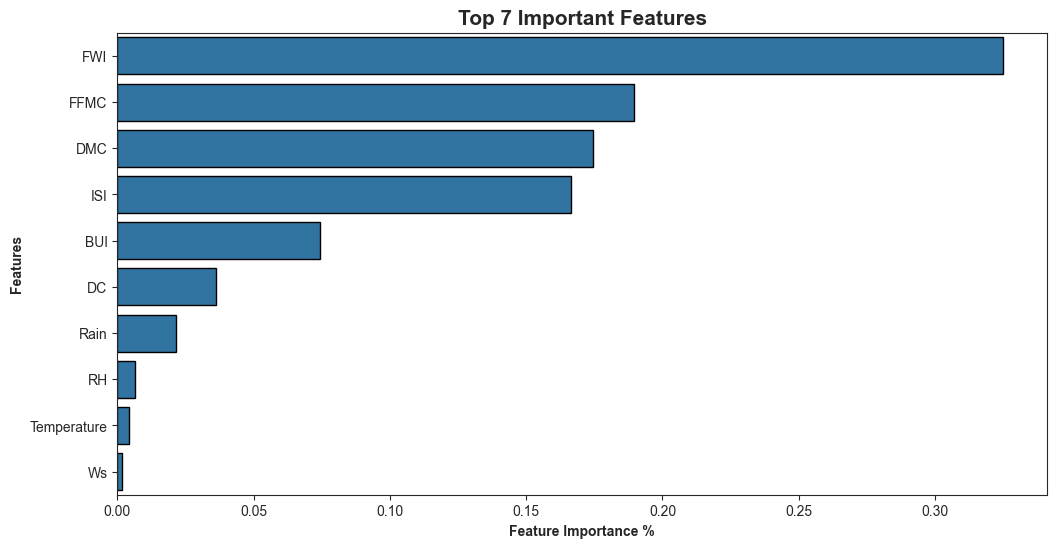

In [444]:

plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

#### To mach the inputs we take the input of the classsifiers


In [445]:

X_train_new = X_train.drop(['Temperature', 'RH','Ws','FWI','DC','BUI'], axis=1)
X_test_new = X_test.drop(['Temperature', 'RH','Ws','FWI','DC','BUI'], axis=1)

In [446]:
X_train_new

,Rain,FFMC,DMC,ISI
230,0.1,90.6,25.8,9.0
218,6.5,64.5,3.3,1.0
184,0.0,93.7,17.1,17.2
233,0.0,92.2,23.6,13.8
204,0.0,91.2,46.1,11.5
144,0.8,74.2,7.0,1.6
16,0.6,37.3,1.1,0.0
89,0.0,90.1,54.2,12.5
212,0.0,89.1,27.8,9.8
74,0.0,87.0,21.7,5.7


In [447]:
X_train_new.columns



Index(['Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [448]:
X_test_new.columns

Index(['Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [449]:
best_random_grid.fit(X_train_new, y_train)
bestrf_pred = best_random_grid.predict(X_test_new)
bestrf_pred

array([1.10690262e+01, 7.39295952e+00, 7.15849048e+00, 4.52914048e+00,
       8.99642500e+00, 1.17153012e+01, 2.33861905e-01, 9.34327381e+00,
       5.70159286e+00, 1.29932988e+01, 1.27626548e+00, 1.39783357e+01,
       5.92711429e+00, 1.63266738e+01, 6.54316667e-01, 2.23311905e-01,
       1.38478571e+00, 2.04293810e+00, 5.05090952e+00, 2.56297619e-01,
       4.97499286e+00, 6.09630238e+00, 2.75037857e+00, 2.27850000e-01,
       2.76873452e+00, 2.84502976e+00, 1.03842750e+01, 3.67976190e-01,
       1.80095238e-01, 1.08794762e+00, 1.61674190e+01, 4.12683333e-01,
       2.58142857e-01, 2.24478976e+01, 5.34985000e+00, 8.39540476e-01,
       9.03433333e-01, 1.37774952e+01, 2.79043643e+01, 1.46265714e+00,
       6.90279524e+00, 6.61242857e-01, 8.87500000e-02, 2.02409762e+00,
       8.57460714e-01, 3.23000000e-02, 3.58399643e+00, 7.36825000e+00,
       4.35785714e-02, 3.79550714e+00, 5.36953333e+00, 1.06691119e+01,
       1.10000000e-02, 2.75626310e+00, 6.89472500e+00, 2.66597976e+00,
      

In [450]:

meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, bestrf_pred)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.6740638563622177
Mean Square Error: 0.9044766398147385
Root Mean Square Error: 0.9510397677356812
R-Square: 0.9739451986304904


In [451]:
import bz2,joblib
with bz2.BZ2File('Regression.joblib', 'wb') as file:
    joblib.dump(best_random_grid, file)


with bz2.BZ2File('Regression.joblib', 'rb') as file:
    loaded_model = joblib.load(file)

In [452]:

sample_input = [[0, 82.6, 5.8, 3.1]]

prediction = loaded_model.predict(sample_input)

print(f"Predicted Class: {prediction[0]}")

Predicted Class: 2.768734523809525


c:\Users\anugr\Downloads\Final Project\Forest fire\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
